**Telecom Customer Churn**

---

Challenge Link: https://www.kaggle.com/c/dsrp-kaggle-semillero-01

Autor: **Keven Fernandez Carrillo**

Versión: 1.0

GitHub: https://github.com/KevenRFC

# 1) IMPORT & INSTALL PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# 2) DATA UNDERSTANDING

## 2.1) Load Data

In [2]:
# Seleccion de Variables a usar en este BASELINE:
features_iniciales = ['ID',
 'Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'FacturacionElectronica',
 'MontoCargadoMes']

In [5]:
import os
print(os.listdir("input"))

['churn_data_test.csv', 'churn_data_train.csv']


In [8]:
# Import from

path = "input/"
df_train = pd.read_csv(path+"churn_data_train.csv",encoding='latin-1', usecols=features_iniciales+['Churn'])
df_test = pd.read_csv(path+"churn_data_test.csv",encoding='latin-1', usecols=features_iniciales)

## 2.2) Data Exploration

### 2.2.1) Basic Statistics

In [9]:
df_train.shape, df_test.shape

((4577, 11), (2466, 10))

In [10]:
df_train.head()

,ID,Sexo,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,ProteccionDispositivo,SoporteTecnico,FacturacionElectronica,MontoCargadoMes,Churn
0,ID01802,Masculino,1.0,11.0,Si,Si,No,No,No,60.25,0
1,ID05696,Masculino,0.0,1.0,Si,No,Sin servicio de internet,Sin servicio de internet,No,20.05,0
2,ID03166,Femenino,0.0,8.0,Si,No,Si,No,Si,94.20,1
3,ID00104,Masculino,0.0,50.0,No,Sin servicio telefonico,No,No,Si,39.45,0
4,ID05060,Femenino,0.0,71.0,Si,Si,Si,Si,Si,118.65,0


In [11]:
df_test.head()

,ID,Sexo,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,ProteccionDispositivo,SoporteTecnico,FacturacionElectronica,MontoCargadoMes
0,ID03436,Masculino,0.0,1.0,Si,No,No,No,No,47.95
1,ID05166,Femenino,0.0,62.0,Si,Si,Si,Si,Si,110.80
2,ID04004,Femenino,0.0,7.0,Si,No,Si,No,Si,86.25
3,ID05309,Femenino,1.0,50.0,Si,Si,Sin servicio de internet,Sin servicio de internet,No,25.20
4,ID05434,Masculino,0.0,1.0,Si,No,Sin servicio de internet,Sin servicio de internet,No,NaN


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 11 columns):
ID                        4577 non-null object
Sexo                      4577 non-null object
AdultoMayor               4503 non-null float64
MesesCliente              4573 non-null float64
ServicioTelefonico        4577 non-null object
LineasMultiples           4577 non-null object
ProteccionDispositivo     4483 non-null object
SoporteTecnico            4483 non-null object
FacturacionElectronica    4531 non-null object
MontoCargadoMes           4163 non-null float64
Churn                     4577 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 393.4+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 10 columns):
ID                        2466 non-null object
Sexo                      2466 non-null object
AdultoMayor               2414 non-null float64
MesesCliente              2459 non-null float64
ServicioTelefonico        2466 non-null object
LineasMultiples           2466 non-null object
ProteccionDispositivo     2404 non-null object
SoporteTecnico            2404 non-null object
FacturacionElectronica    2442 non-null object
MontoCargadoMes           2267 non-null float64
dtypes: float64(3), object(7)
memory usage: 192.7+ KB


In [14]:
# Defining features types
ID = 'ID'
TARGET = 'Churn'

In [15]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    3362
1    1215
Name: Churn, dtype: int64

In [16]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.454228
1    26.545772
Name: Churn, dtype: float64

In [17]:
# Generar estadisticos básicos para cada variable:
### count: Count number of non-NA/null observations.	
### unique: Count uniques numbers of non-NA/null observations.
### top: Mean of the values.
### freq: Mean of the values.

### mean: Mean of the values.
### std: Standard deviation of the observations.

### min: Minimum of the values in the object.
### X%: The value of Quartil: 25% - Q1 , 50% - Q2, 75% - Q3
### max: Maximum of the values in the object.

df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4577,4577,ID05701,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,4577,2,Masculino,2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,4577,3,0.0,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,4573,NaN,NaN,NaN,32.4083,24.6555,1,9,29,56,72
ServicioTelefonico,4577,2,Si,4118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,4577,3,No,2205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProteccionDispositivo,4483,3,No,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SoporteTecnico,4483,3,No,2249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FacturacionElectronica,4531,2,Si,2714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MontoCargadoMes,4163,NaN,NaN,NaN,68.7042,28.0161,20,48.75,74.4,90.825,118.65


In [18]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica

### 2.2.2) EDA

#### 2.2.2.a) Evaluate missings

In [20]:
#!pip install missingno

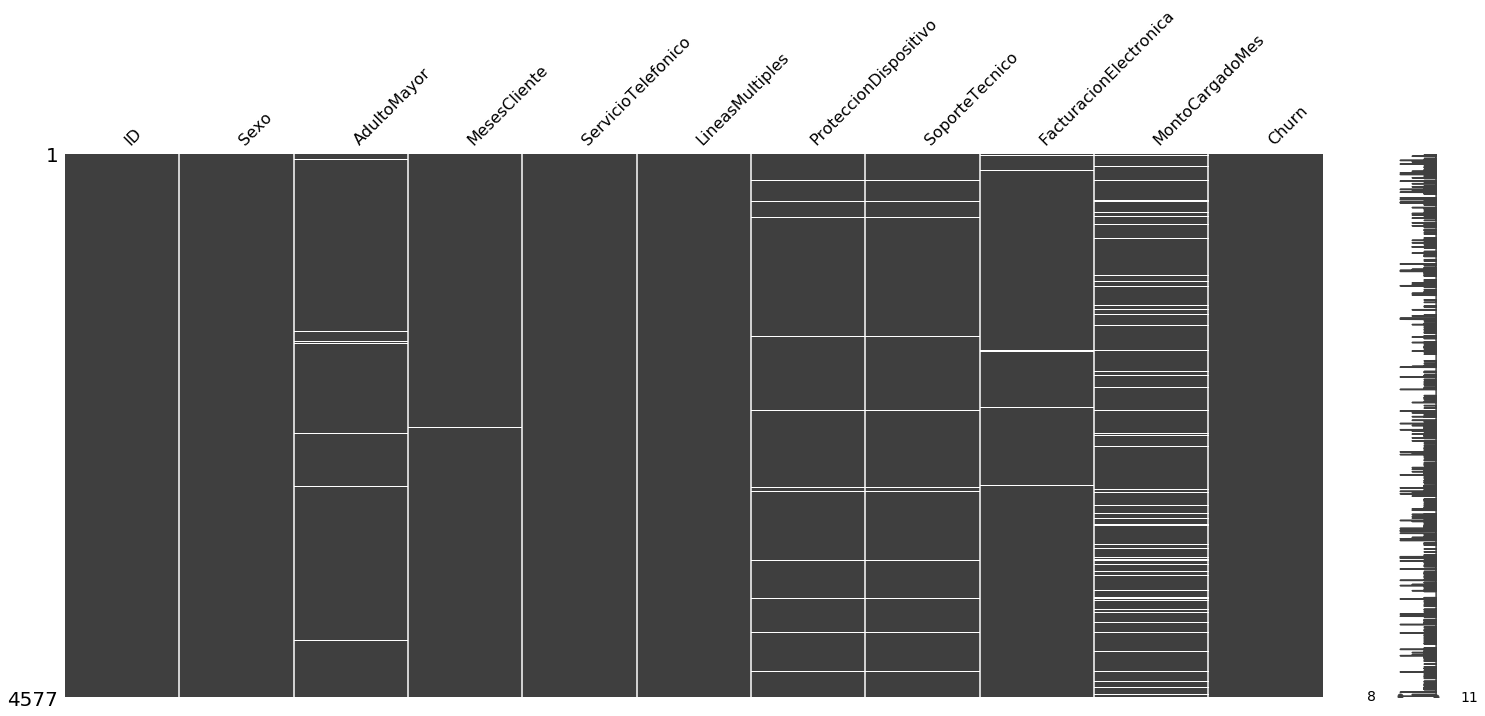

In [21]:
import missingno as msno
msno.matrix(df_train)

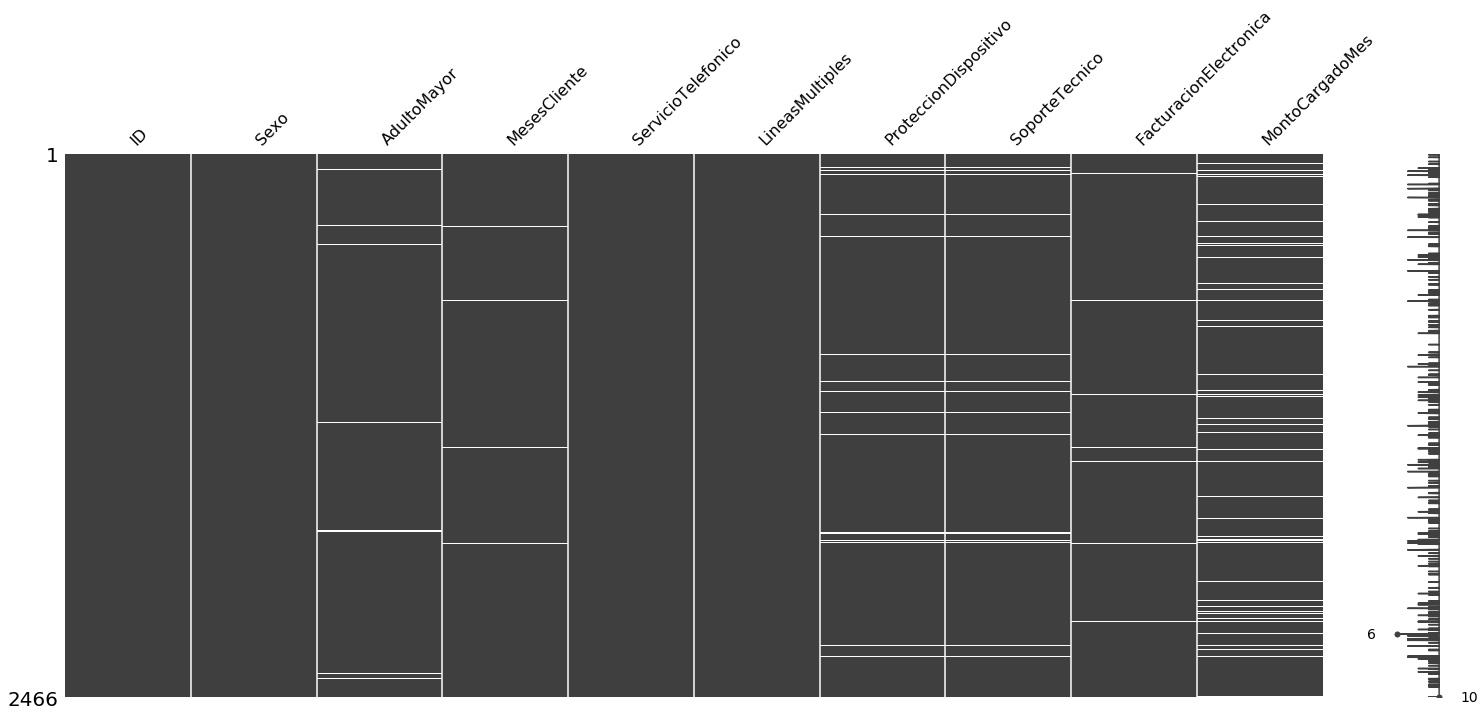

In [22]:
msno.matrix(df_test)

#### 2.2.3.b) Identify outliers

In [23]:
None

#### 2.2.4.c) Adictionales

In [24]:
None

# 3) DATA PREPARATION

In [25]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

ds_test = df_test.copy()

## 3.1) Data Cleaning

### 3.1.1) Impute missings

In [27]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

# MesesCliente (imputacion por MEDIA)
ds_train["MesesCliente"].fillna(32, inplace = True)
ds_test["MesesCliente"].fillna(32, inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# FacturacionElectronica (imputacion por MEDIA)
ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
ds_test["MontoCargadoMes"].fillna(68.7, inplace = True)

### 3.1.2) Treat outliers

In [28]:
None

## 3.2) Data Transformation

In [29]:
ds_train.head()

,ID,Sexo,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,ProteccionDispositivo,SoporteTecnico,FacturacionElectronica,MontoCargadoMes,Churn
0,ID01802,Masculino,1.0,11.0,Si,Si,No,No,No,60.25,0
1,ID05696,Masculino,0.0,1.0,Si,No,Sin servicio de internet,Sin servicio de internet,No,20.05,0
2,ID03166,Femenino,0.0,8.0,Si,No,Si,No,Si,94.20,1
3,ID00104,Masculino,0.0,50.0,No,Sin servicio telefonico,No,No,Si,39.45,0
4,ID05060,Femenino,0.0,71.0,Si,Si,Si,Si,Si,118.65,0


In [30]:
# Sexo 
dicc_sexo = {'Masculino': 1, 'Femenino':0 }
ds_train["Sexo"] = ds_train["Sexo"].map(dicc_sexo)
ds_test["Sexo"] = ds_test["Sexo"].map(dicc_sexo)

In [31]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

# LineasMultiples 
dicc_lin_mult = {'Si': 2, 'No':1, 'Sin servicio telefonico':0 }
ds_train["LineasMultiples"] = ds_train["LineasMultiples"].map(dicc_lin_mult)
ds_test["LineasMultiples"] = ds_test["LineasMultiples"].map(dicc_lin_mult)

# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

# Crear Features Dummies
ds_train.loc[ds_train['ProteccionDispositivo']=='Sin servicio de internet', 'ProteccionDispositivo'] = 'SinServInter'
ds_train.loc[ds_train['SoporteTecnico']=='Sin servicio de internet', 'SoporteTecnico'] = 'SinServInter'

ds_test.loc[ds_test['ProteccionDispositivo']=='Sin servicio de internet', 'ProteccionDispositivo'] = 'SinServInter'
ds_test.loc[ds_test['SoporteTecnico']=='Sin servicio de internet', 'SoporteTecnico'] = 'SinServInter'

ds_train = pd.get_dummies(ds_train, columns=['ProteccionDispositivo','SoporteTecnico'])
ds_test = pd.get_dummies(ds_test, columns=['ProteccionDispositivo','SoporteTecnico'])

In [35]:
ds_train.head()

,ID,Sexo,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,FacturacionElectronica,MontoCargadoMes,Churn,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_SinServInter,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServInter
0,ID01802,1,1.0,11.0,1,2,0,60.25,0,1,0,0,1,0,0
1,ID05696,1,0.0,1.0,1,1,0,20.05,0,0,0,1,0,0,1
2,ID03166,0,0.0,8.0,1,1,1,94.20,1,0,1,0,1,0,0
3,ID00104,1,0.0,50.0,0,0,1,39.45,0,1,0,0,1,0,0
4,ID05060,0,0.0,71.0,1,2,1,118.65,0,0,1,0,0,1,0


## 3.3) Feature Engineering

In [36]:
# New Feature 1
tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
tmp_byAdultoMayor_medianMontoMes

AdultoMayor
0.0    69.0
1.0    85.0
Name: MontoCargadoMes, dtype: float64

In [38]:
ds_train['flg_bySexo_mayorMedianMontoMes'] = ds_train.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

ds_test['flg_bySexo_mayorMedianMontoMes'] = ds_test.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

In [39]:
ds_train.head(10)

,ID,Sexo,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,FacturacionElectronica,MontoCargadoMes,Churn,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_SinServInter,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServInter,flg_bySexo_mayorMedianMontoMes
0,ID01802,1,1.0,11.0,1,2,0,60.25,0,1,0,0,1,0,0,0
1,ID05696,1,0.0,1.0,1,1,0,20.05,0,0,0,1,0,0,1,0
2,ID03166,0,0.0,8.0,1,1,1,94.20,1,0,1,0,1,0,0,1
3,ID00104,1,0.0,50.0,0,0,1,39.45,0,1,0,0,1,0,0,0
4,ID05060,0,0.0,71.0,1,2,1,118.65,0,0,1,0,0,1,0,1
5,ID03313,0,0.0,35.0,1,1,1,106.90,0,0,1,0,0,1,0,1
6,ID04147,0,1.0,11.0,1,2,1,55.60,0,1,0,0,1,0,0,0
7,ID05700,1,0.0,1.0,1,1,0,20.10,1,0,0,1,0,0,1,0
8,ID01972,0,0.0,32.0,1,1,0,84.15,1,1,0,0,1,0,0,1
9,ID00184,0,0.0,4.0,1,1,1,20.15,0,0,0,1,0,0,1,0


In [40]:
# New Feature 2,3,4, ...
### Here

## 3.4) Feature Selection

In [41]:
features_to_model = list(ds_train.columns)

features_to_model.remove(TARGET) # Eliminar variable Target
features_to_model.remove(ID) # Eliminar variable ID

list(features_to_model)

['Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'FacturacionElectronica',
 'MontoCargadoMes',
 'ProteccionDispositivo_No',
 'ProteccionDispositivo_Si',
 'ProteccionDispositivo_SinServInter',
 'SoporteTecnico_No',
 'SoporteTecnico_Si',
 'SoporteTecnico_SinServInter',
 'flg_bySexo_mayorMedianMontoMes']

***Select Final Features:***

In [42]:
# Selección de variables. 
### Una opción es: en base a un modelo basado en árboles, generar la importancia de Variables y seleccionar los features mas importantes.
features_to_model = features_to_model # ['var1', 'var2', 'varn'] 

In [43]:
len(features_to_model)

14

In [44]:
# Features & Target
X = ds_train[features_to_model]
y = ds_train[TARGET]

X_summit = ds_test[features_to_model]

In [45]:
print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (4577, 14) , summit:  (2466, 14)


## 3.5) Train & Test Split

In [46]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(3203, 3203) (1374, 1374)


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 2927 to 382
Data columns (total 14 columns):
Sexo                                  3203 non-null int64
AdultoMayor                           3203 non-null float64
MesesCliente                          3203 non-null float64
ServicioTelefonico                    3203 non-null int64
LineasMultiples                       3203 non-null int64
FacturacionElectronica                3203 non-null int64
MontoCargadoMes                       3203 non-null float64
ProteccionDispositivo_No              3203 non-null uint8
ProteccionDispositivo_Si              3203 non-null uint8
ProteccionDispositivo_SinServInter    3203 non-null uint8
SoporteTecnico_No                     3203 non-null uint8
SoporteTecnico_Si                     3203 non-null uint8
SoporteTecnico_SinServInter           3203 non-null uint8
flg_bySexo_mayorMedianMontoMes        3203 non-null int64
dtypes: float64(3), int64(5), uint8(6)
memory usage: 244.0 KB


# 4) Modeling & Evaluation - Simple

## 4.1.A. LogisticRegression

### 4.1.1 Training

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Create  model objet 
model_rlog = LogisticRegression(C=0.01, max_iter= 100, random_state=0, n_jobs = 4, penalty = 'l1')

# Fit the model:
model_rlog.fit(X_train, y_train)

model = model_rlog 

In [50]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights

,feature,beta
0,Sexo,0.0000
1,AdultoMayor,0.0000
2,MesesCliente,-0.0507
3,ServicioTelefonico,0.0000
4,LineasMultiples,0.0000
5,FacturacionElectronica,0.0000
6,MontoCargadoMes,0.0080
7,ProteccionDispositivo_No,0.0000
8,ProteccionDispositivo_Si,0.0000
9,ProteccionDispositivo_SinServInter,-0.1982


### 4.1.2 Evaluación del Modelo

In [51]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [52]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7730252887917577
Accuracy - Test : 0.7569141193595342


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [54]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

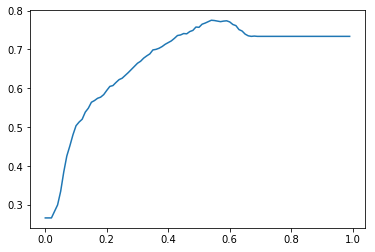

In [55]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [56]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.54


In [57]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7858257883234467
Accuracy - Test : 0.7751091703056768


## 4.1.B. Decision Tree

### 4.1.1 Training

In [58]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
# Create  model objet 
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,random_state=0)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

### 4.1.2 Evaluación del Modelo

In [60]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [61]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8129878239150796
Accuracy - Test : 0.7867540029112081


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [62]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

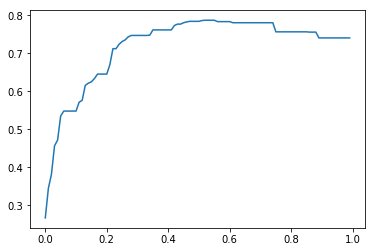

In [63]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [64]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.52


In [65]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8126756166094287
Accuracy - Test : 0.7874818049490538


### Feature Importances

In [66]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,MesesCliente,0.496030
1,MontoCargadoMes,0.363359
2,FacturacionElectronica,0.038265
3,SoporteTecnico_Si,0.024490
4,SoporteTecnico_SinServInter,0.016940
5,AdultoMayor,0.014162
6,LineasMultiples,0.012887
7,ProteccionDispositivo_SinServInter,0.009488
8,SoporteTecnico_No,0.009024
9,ProteccionDispositivo_Si,0.005007


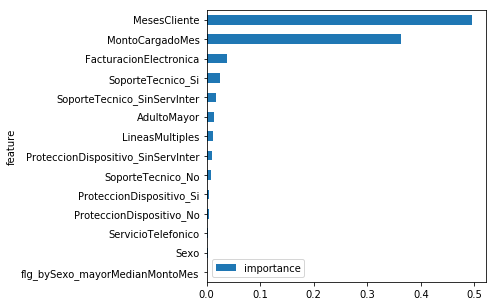

In [67]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.1.C. Random Forest

### 4.1.1 Training

In [68]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
# Create  model objet 
model_rf = RandomForestClassifier(n_estimators = 150, random_state = 0, max_depth=5, 
                                  max_features = 0.5, min_samples_leaf = 10, 
                                  n_jobs = -1)

# Fit the model:
model_rf.fit(X_train, y_train)

model = model_rf

### 4.1.2 Evaluación del Modelo

In [70]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [71]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8126756166094287
Accuracy - Test : 0.7802037845705968


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [72]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

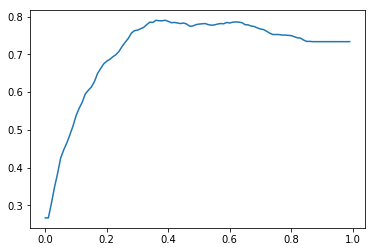

In [73]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [74]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.36


In [75]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8014361536059944
Accuracy - Test : 0.7903930131004366


### Feature Importances

In [76]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,MesesCliente,0.468132
1,MontoCargadoMes,0.210376
2,SoporteTecnico_No,0.131923
3,flg_bySexo_mayorMedianMontoMes,0.038628
4,ProteccionDispositivo_No,0.033334
5,FacturacionElectronica,0.023274
6,SoporteTecnico_SinServInter,0.018511
7,ProteccionDispositivo_SinServInter,0.018392
8,AdultoMayor,0.017806
9,LineasMultiples,0.012128


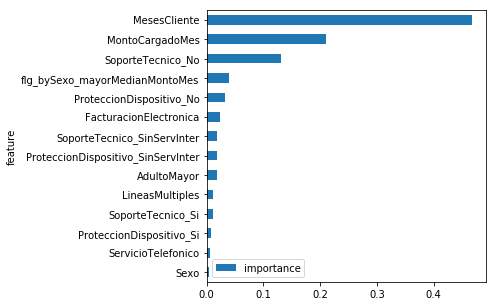

In [77]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

**MODELO FINAL**

Como se puede notar, de los 3 tipos de algoritmos entrenados, el modelo basado en Random Forrest es el ganador con un accuracy optimizado por el punto de corte (threhold: 0.36)

# Predicciones on Submission DS

In [78]:
pred_prob_subm = model_rf.predict_proba(X_summit)[:,1]
pred_subm = [1 if x >= best_threshold else 0 for x in pred_prob_subm]

In [79]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = df_test[ID]
Y_summit_pred[TARGET] = pred_subm #pred_prob_subm
Y_summit_pred.head()

,ID,Churn
0,ID03436,1
1,ID05166,0
2,ID04004,1
3,ID05309,0
4,ID05434,0


To submission:

In [72]:
Y_summit_pred.to_csv("krfc_submission_01_baseline.csv", index = False)